In [2]:
# Re-import necessary library
import pandas as pd

# Load the uploaded threshold analysis file
threshold_df = pd.read_csv(f"Data\Data for CD Label\Threshold_Setting_Process.csv")

# Display the first few rows to verify structure
threshold_df.head()


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_9132\1915083991.py:5: SyntaxWarning: invalid escape sequence '\D'
  threshold_df = pd.read_csv(f"Data\Data for CD Label\Threshold_Setting_Process.csv")


,Region,Threshold,Average Recovery Lag,Minimum Recovery Lag,Total Recovery Events
0,Brigalow Belt,0.02,3.17,1,18
1,Brigalow Belt,0.03,3.35,1,17
2,Brigalow Belt,0.04,3.40,1,15
3,Brigalow Belt,0.05,3.80,2,15
4,Cape York Peninsula,0.02,2.20,1,10


In [5]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


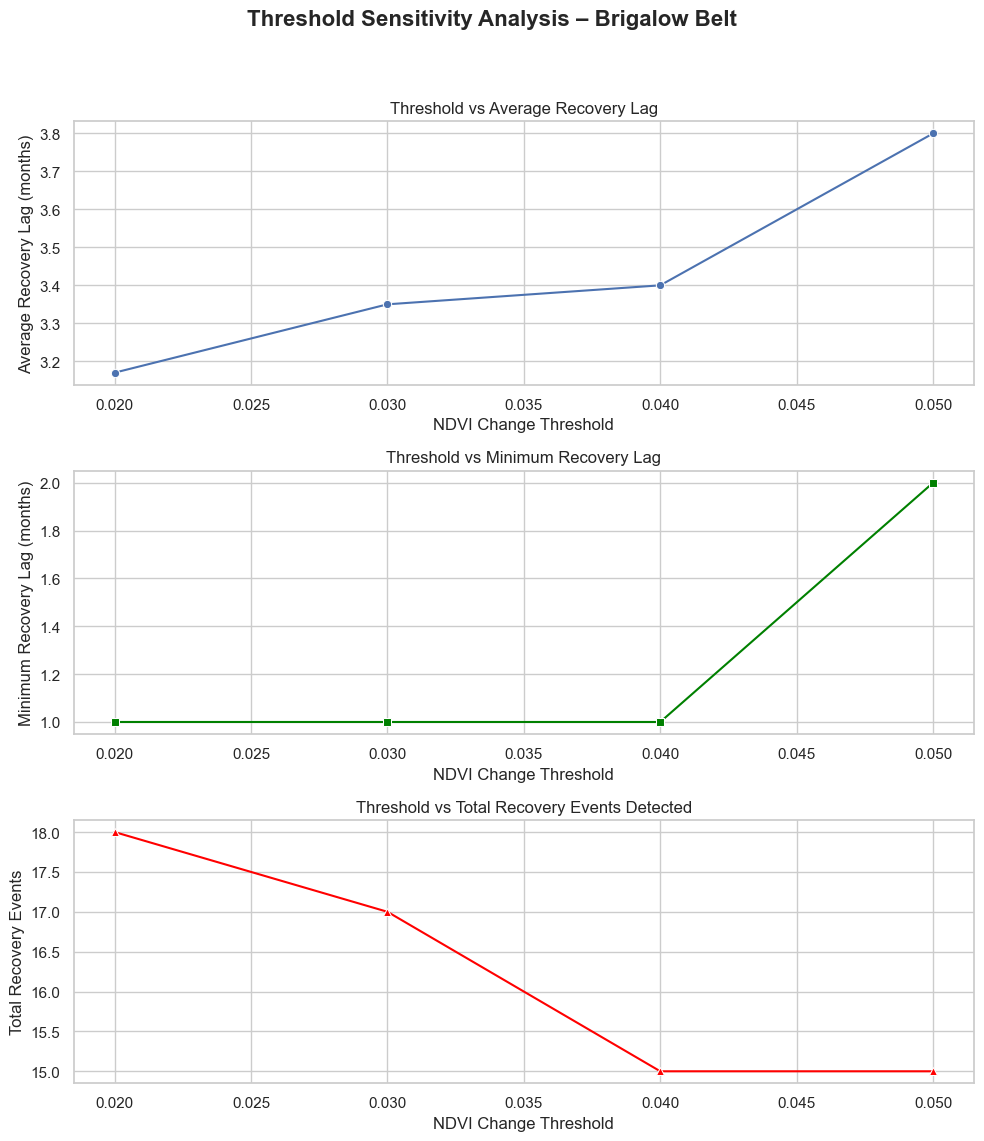

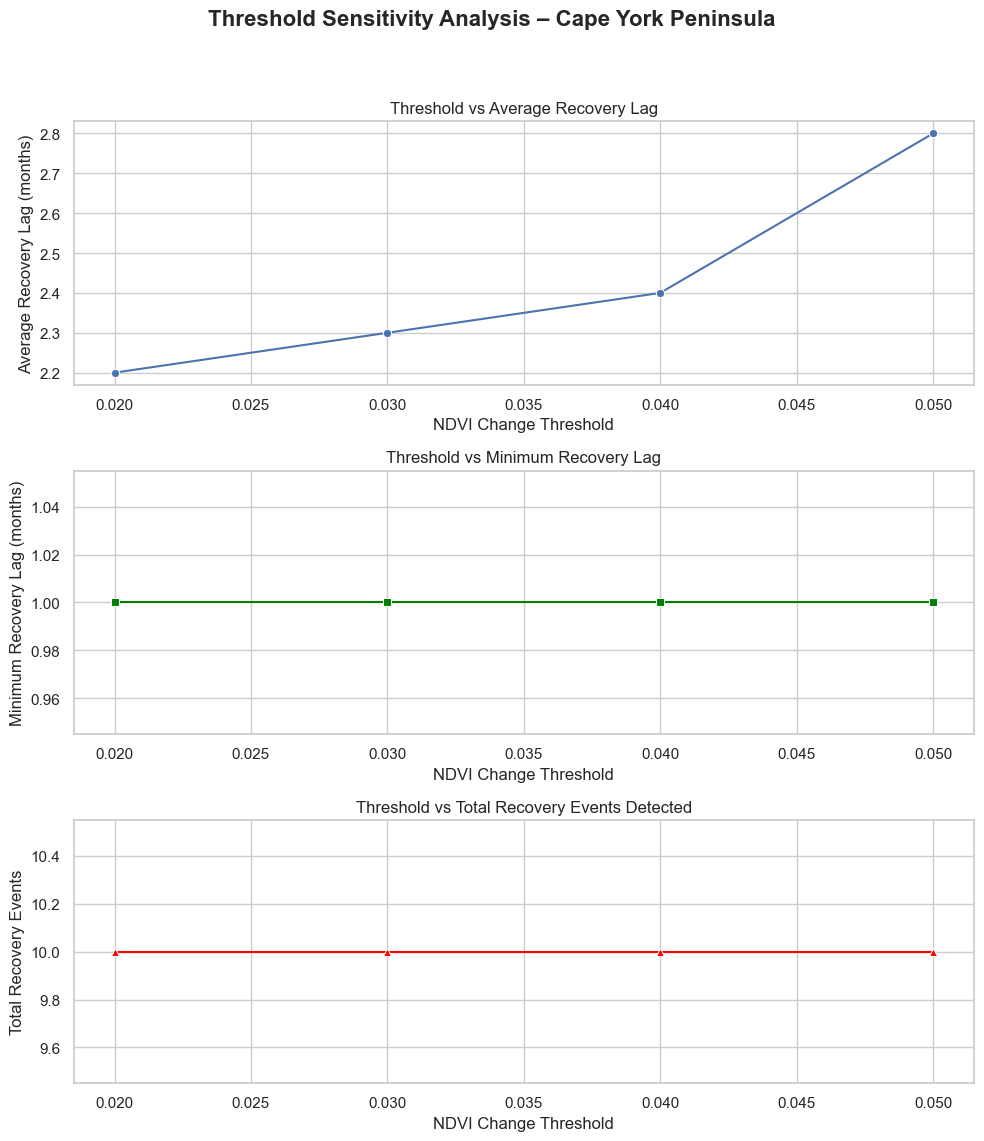

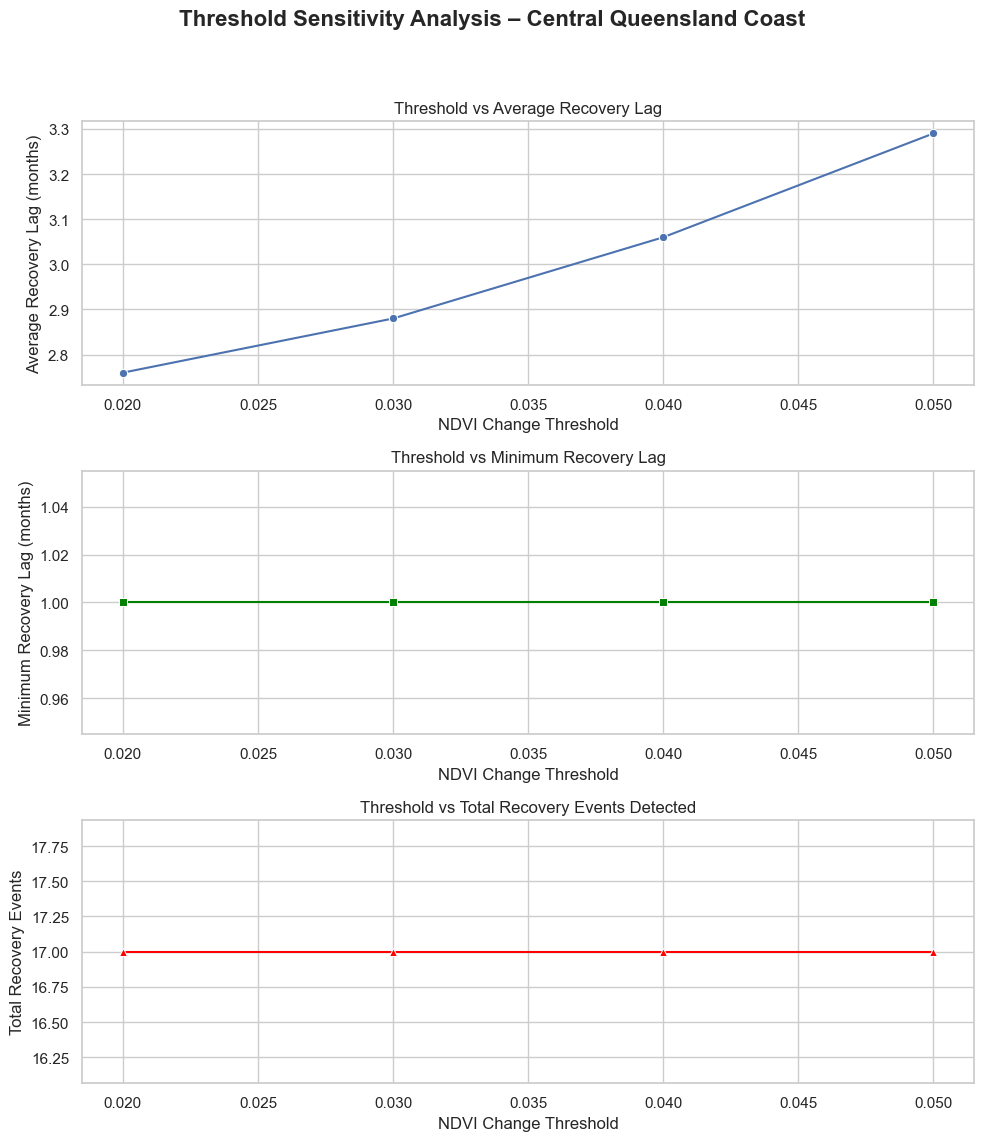

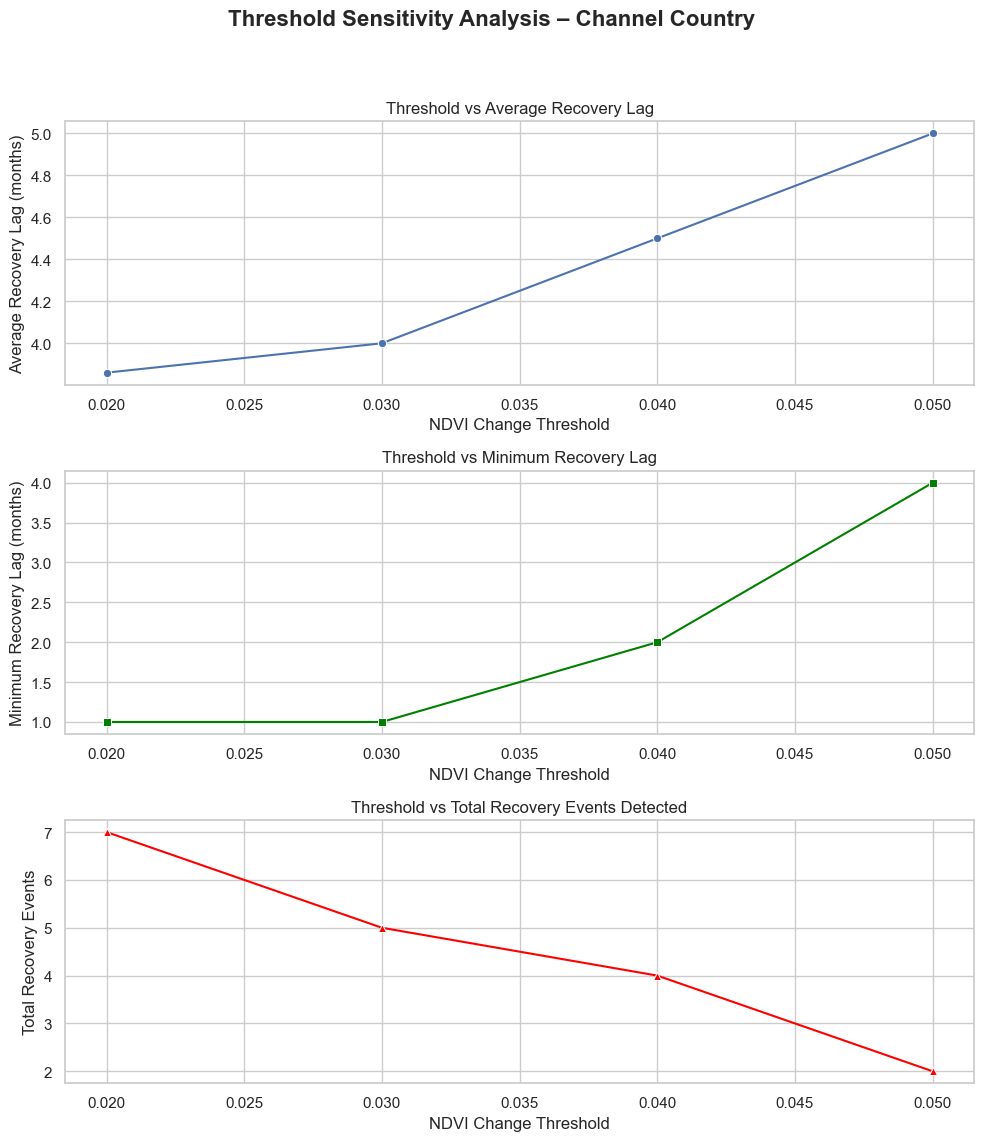

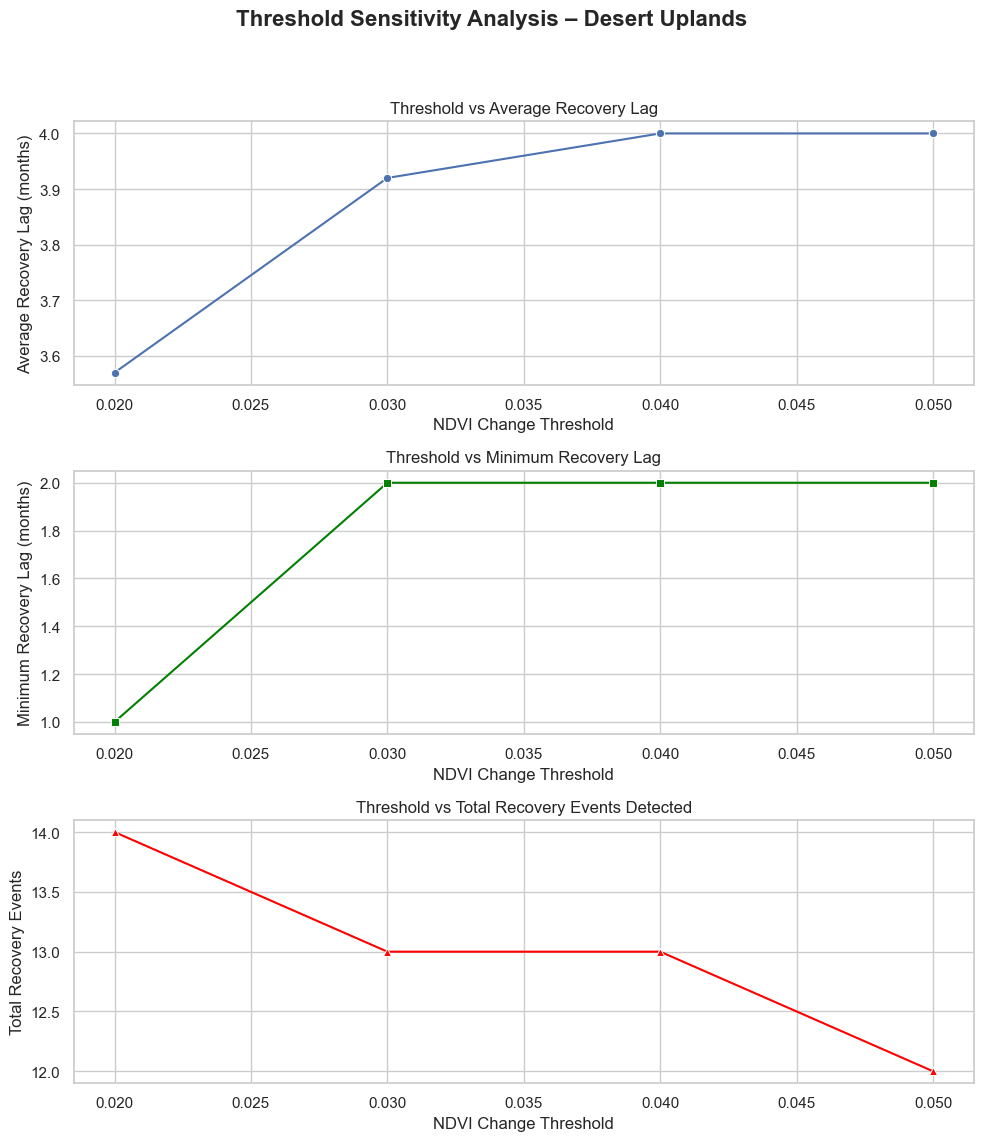

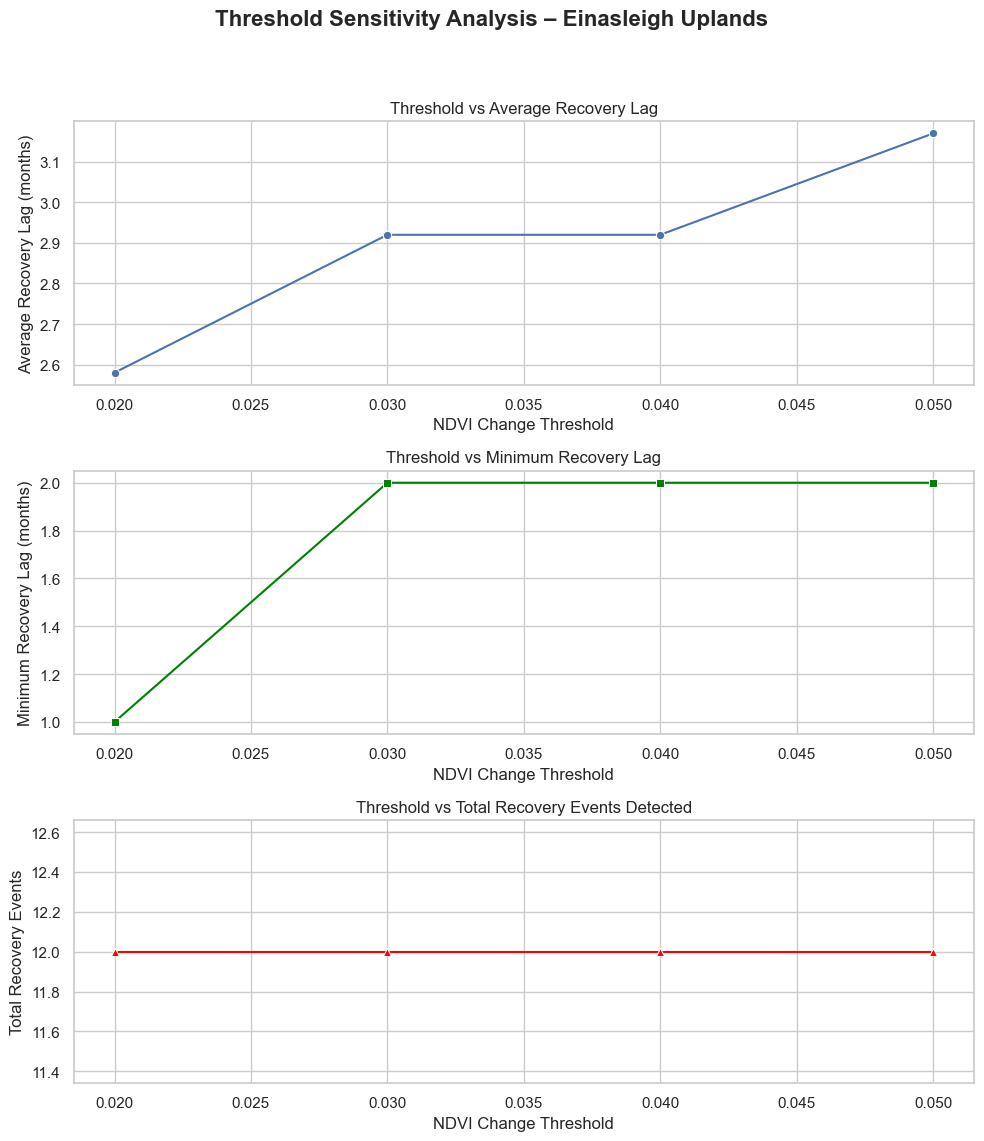

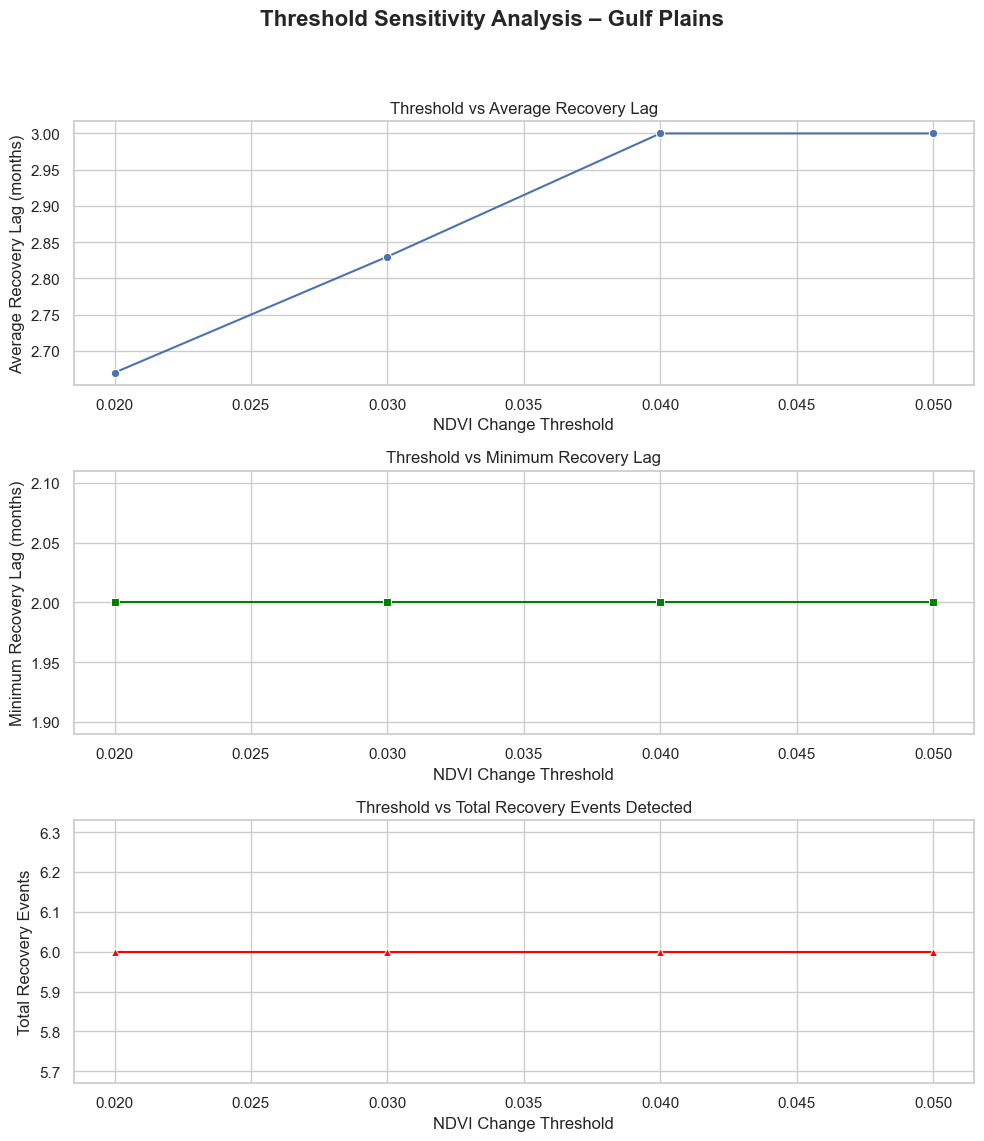

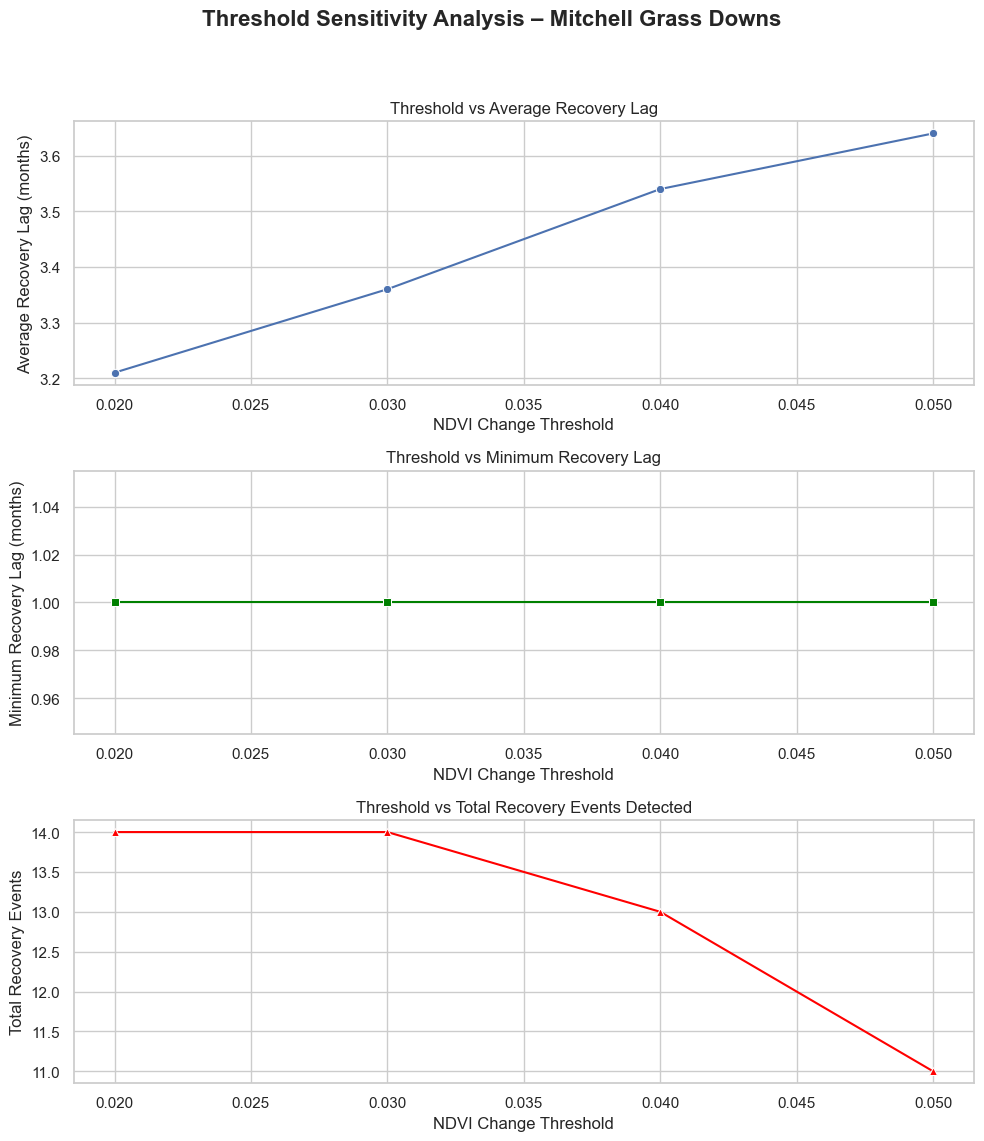

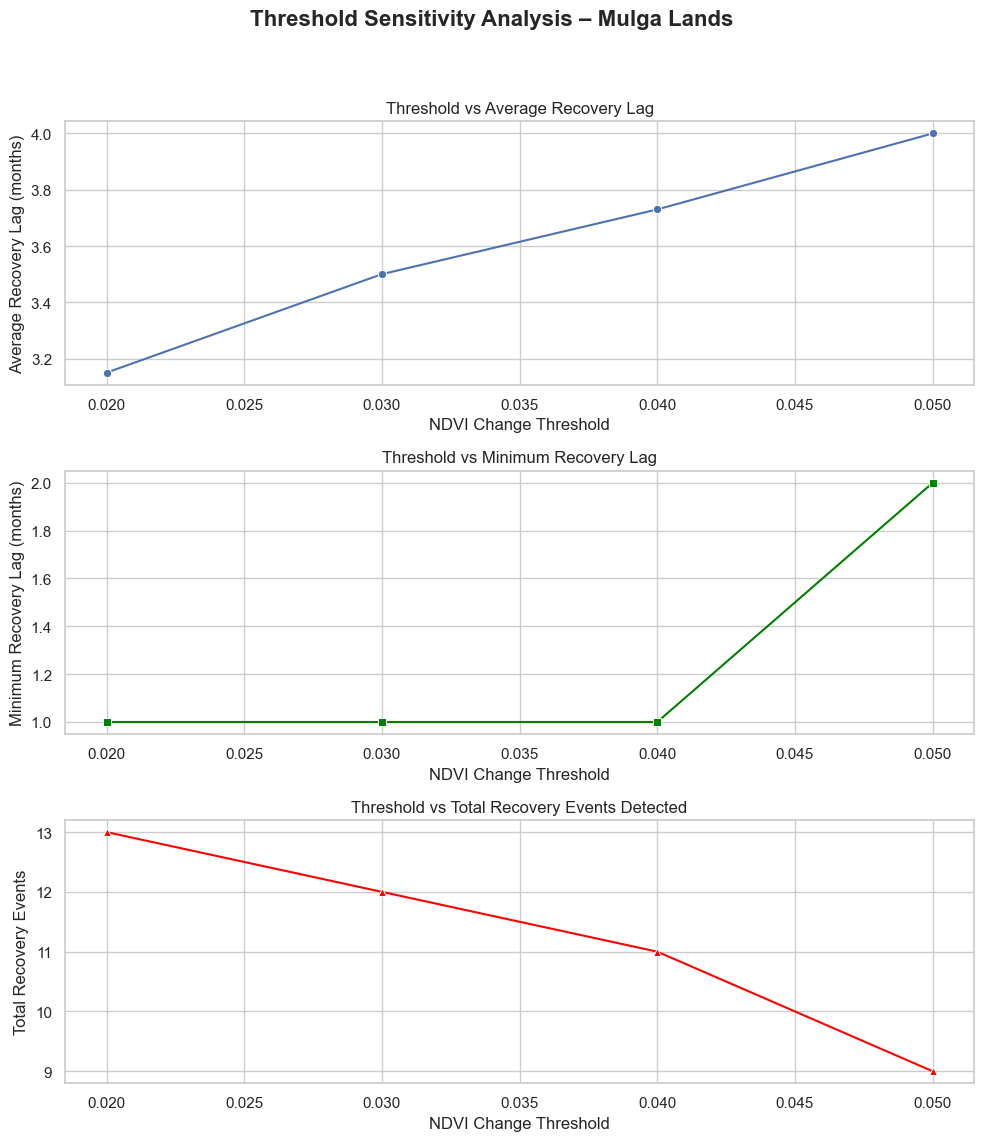

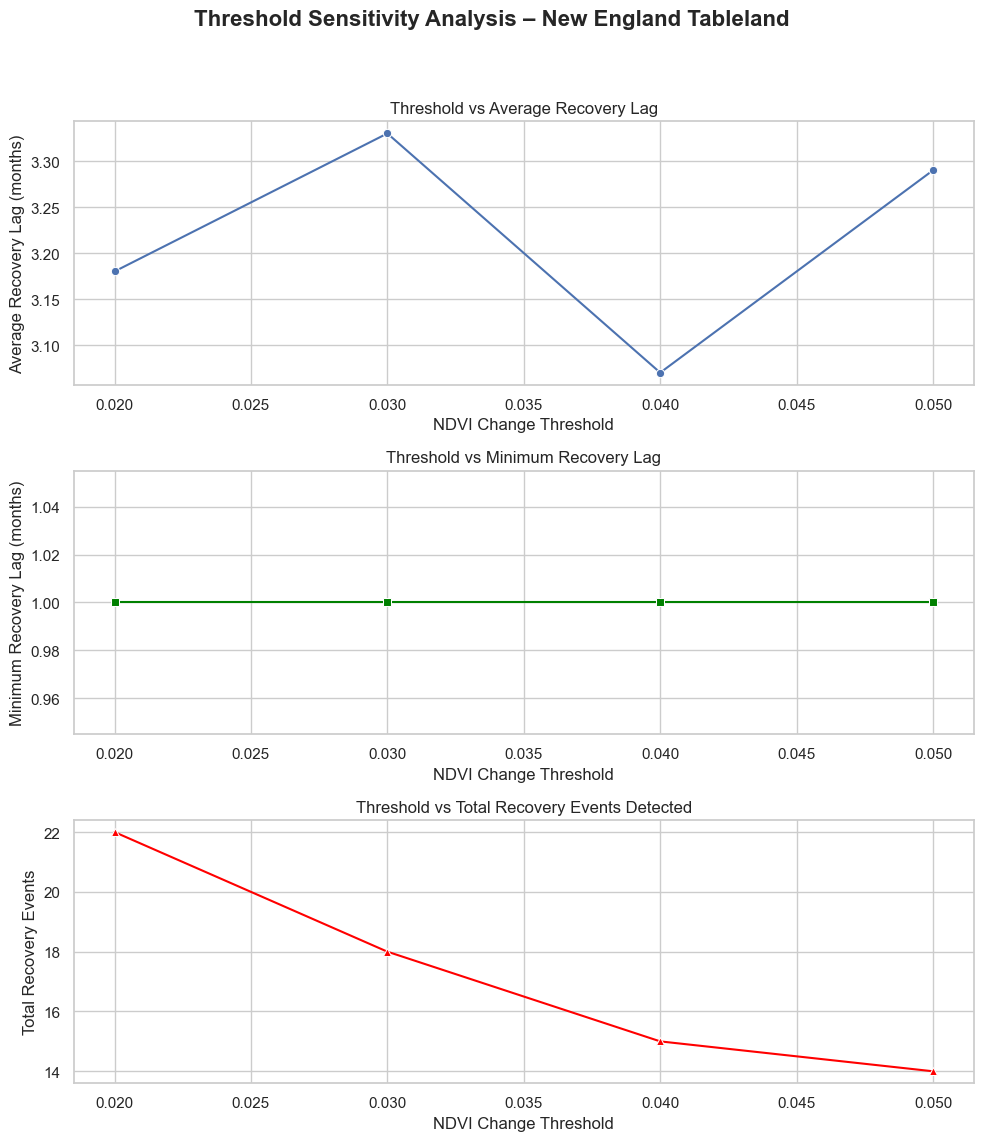

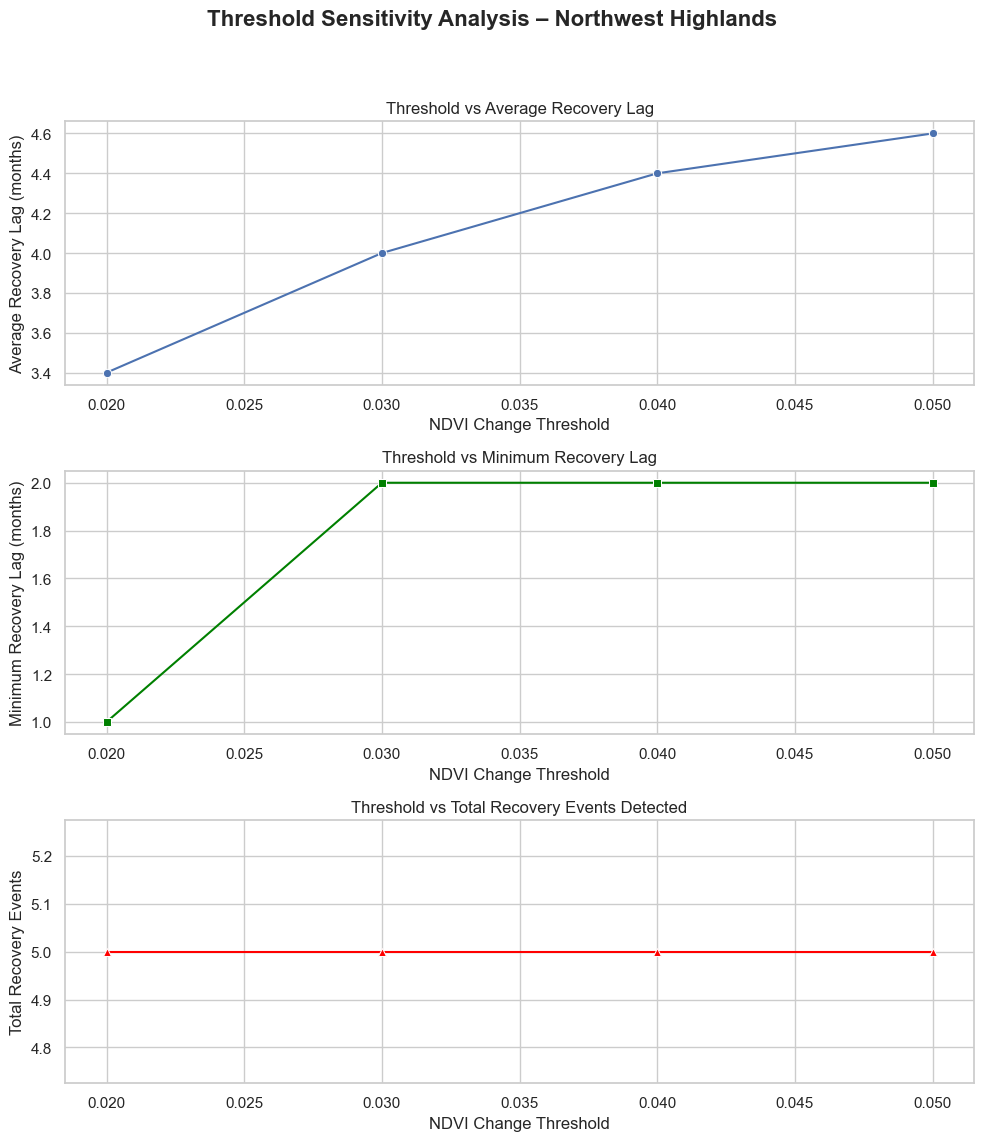

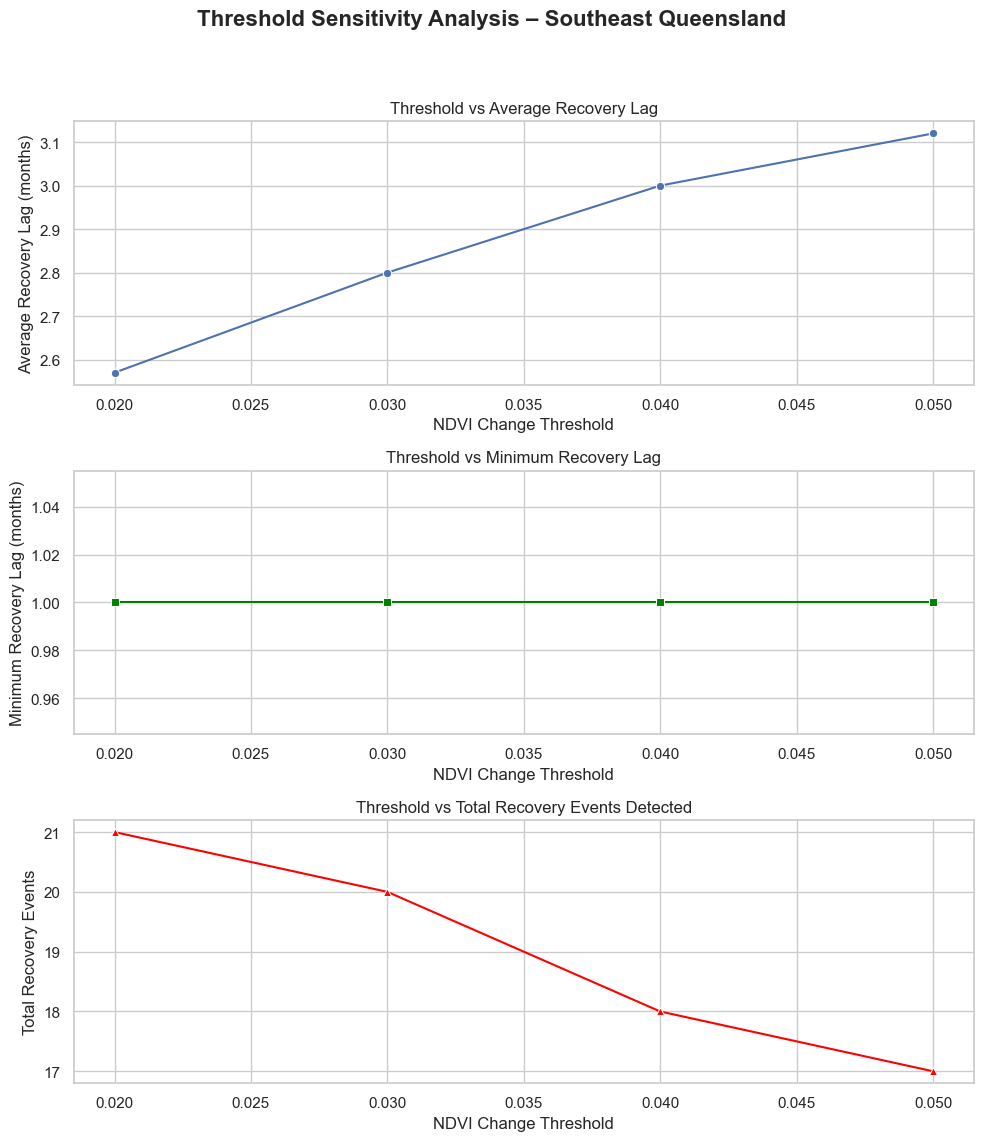

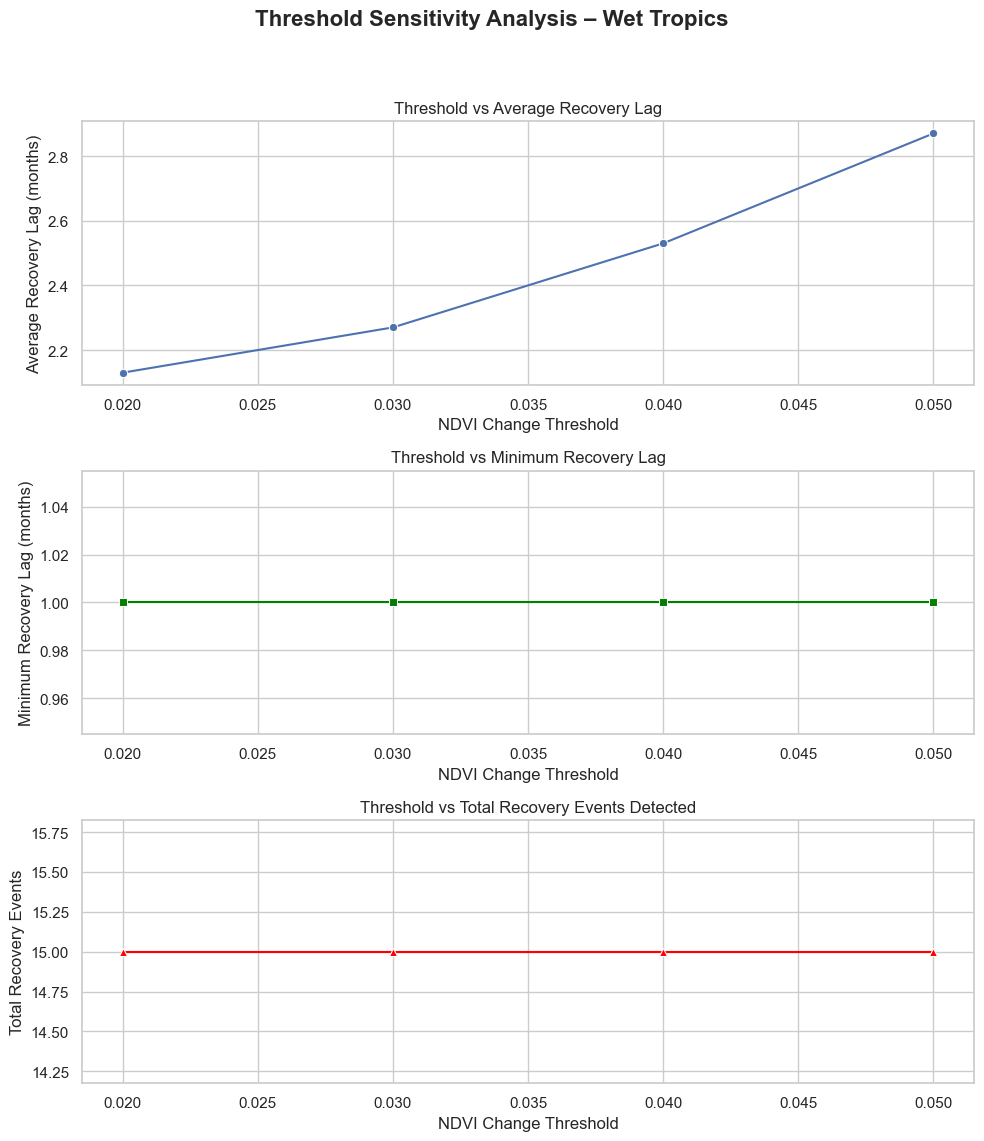

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice visual theme
sns.set_theme(style="whitegrid")

# Get the list of regions
regions = threshold_df['Region'].unique()

# Create plots for each region
for region in regions:
    region_data = threshold_df[threshold_df['Region'] == region]

    fig, axs = plt.subplots(3, 1, figsize=(10, 12))
    fig.suptitle(f"Threshold Sensitivity Analysis – {region}", fontsize=16, fontweight='bold')

    # Plot 1: Average Recovery Lag vs Threshold
    sns.lineplot(ax=axs[0], data=region_data, x='Threshold', y='Average Recovery Lag', marker="o")
    axs[0].set_title('Threshold vs Average Recovery Lag')
    axs[0].set_xlabel('NDVI Change Threshold')
    axs[0].set_ylabel('Average Recovery Lag (months)')

    # Plot 2: Minimum Recovery Lag vs Threshold
    sns.lineplot(ax=axs[1], data=region_data, x='Threshold', y='Minimum Recovery Lag', marker="s", color="green")
    axs[1].set_title('Threshold vs Minimum Recovery Lag')
    axs[1].set_xlabel('NDVI Change Threshold')
    axs[1].set_ylabel('Minimum Recovery Lag (months)')

    # Plot 3: Total Recovery Events vs Threshold
    sns.lineplot(ax=axs[2], data=region_data, x='Threshold', y='Total Recovery Events', marker="^", color="red")
    axs[2].set_title('Threshold vs Total Recovery Events Detected')
    axs[2].set_xlabel('NDVI Change Threshold')
    axs[2].set_ylabel('Total Recovery Events')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


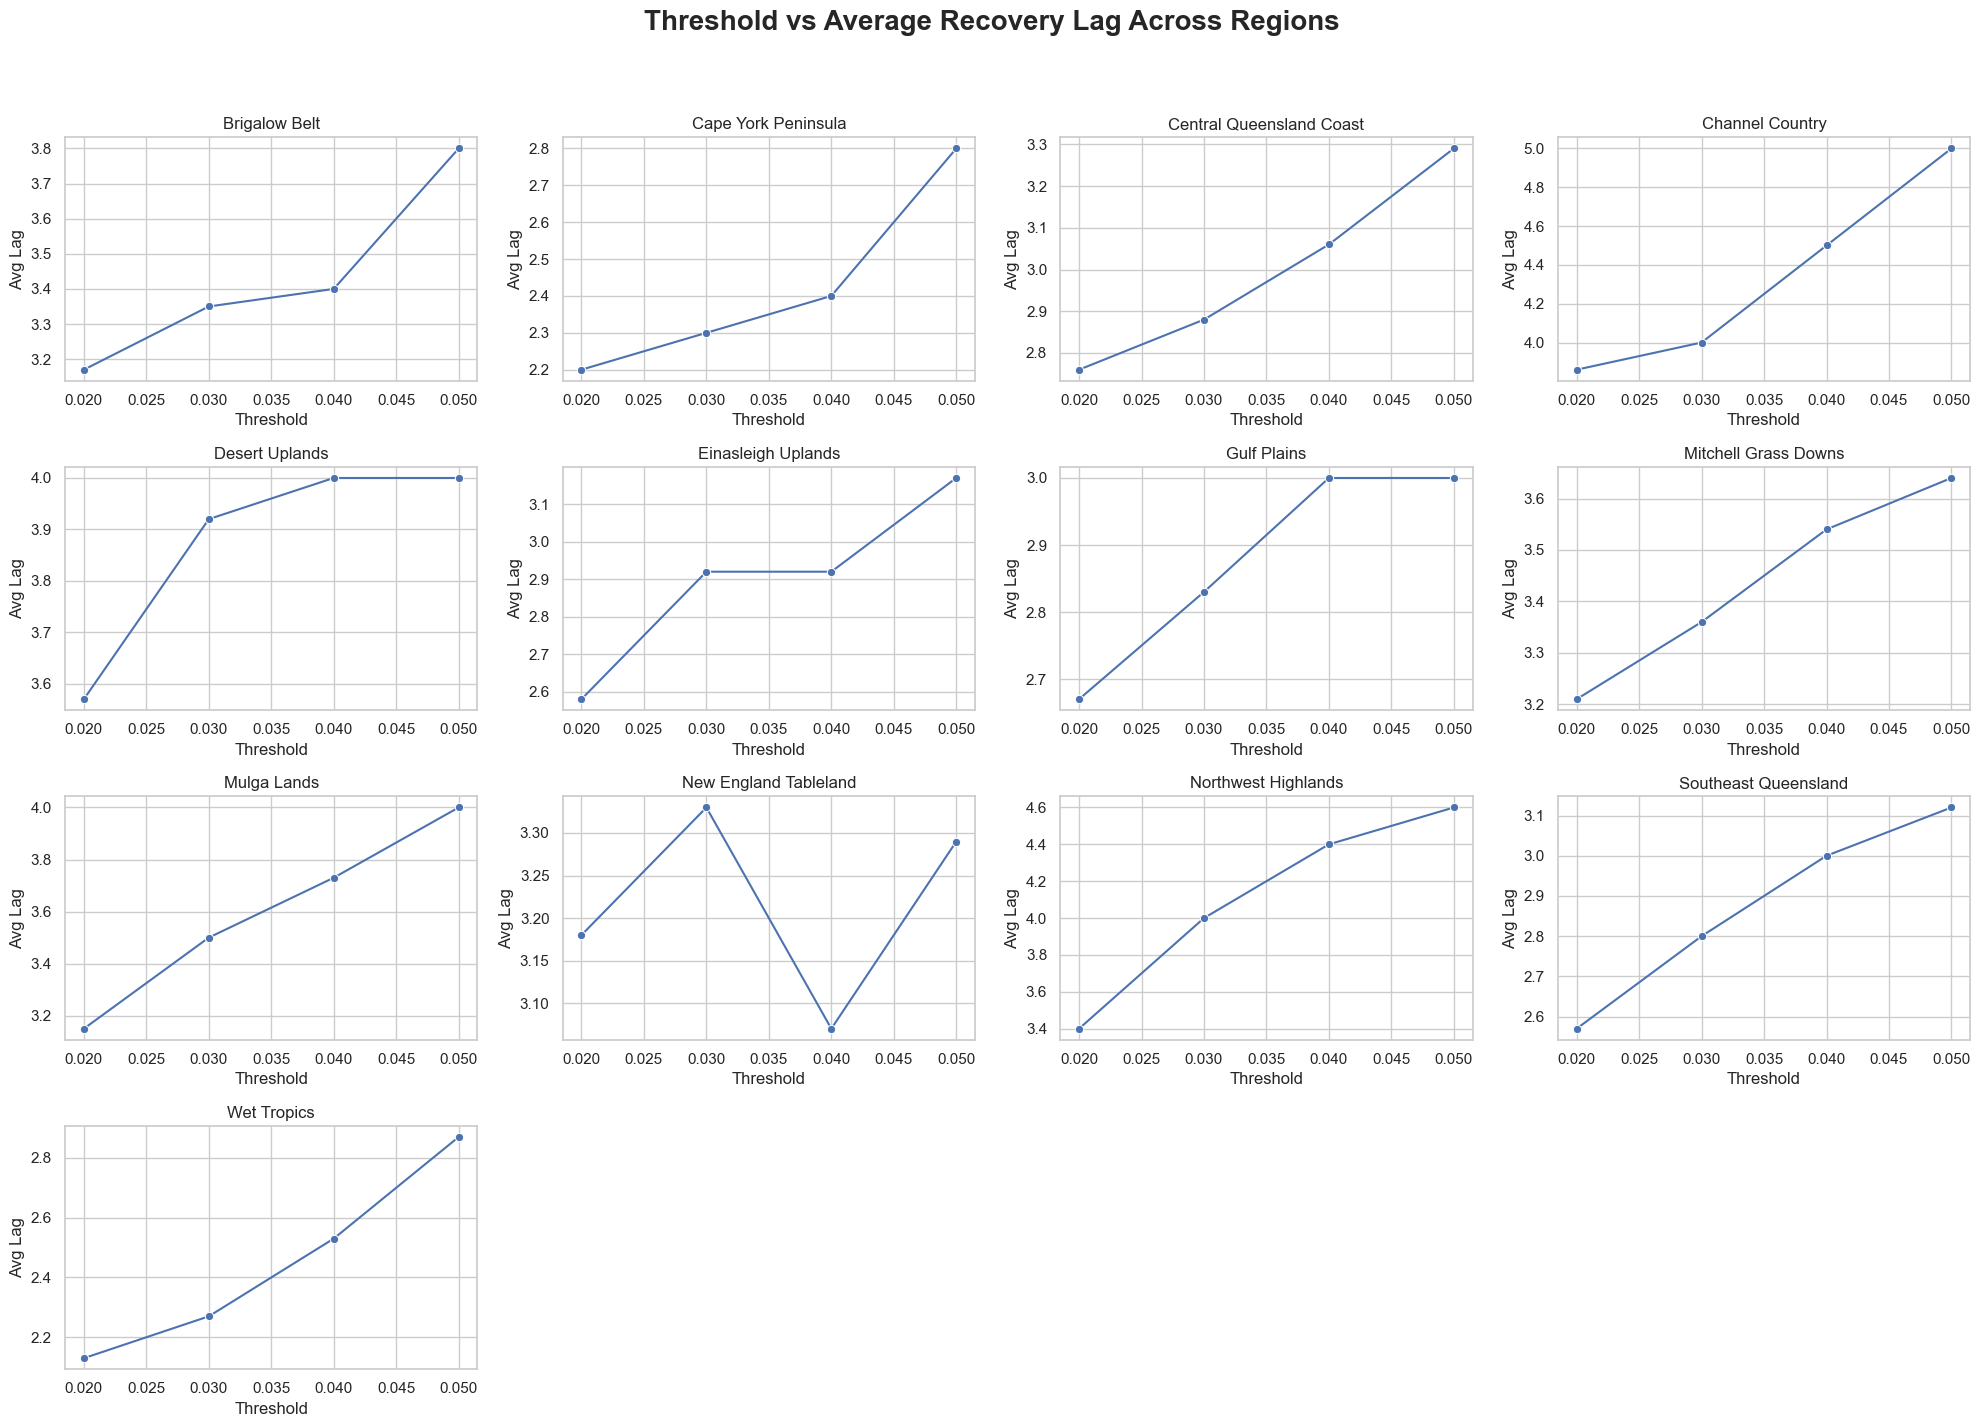

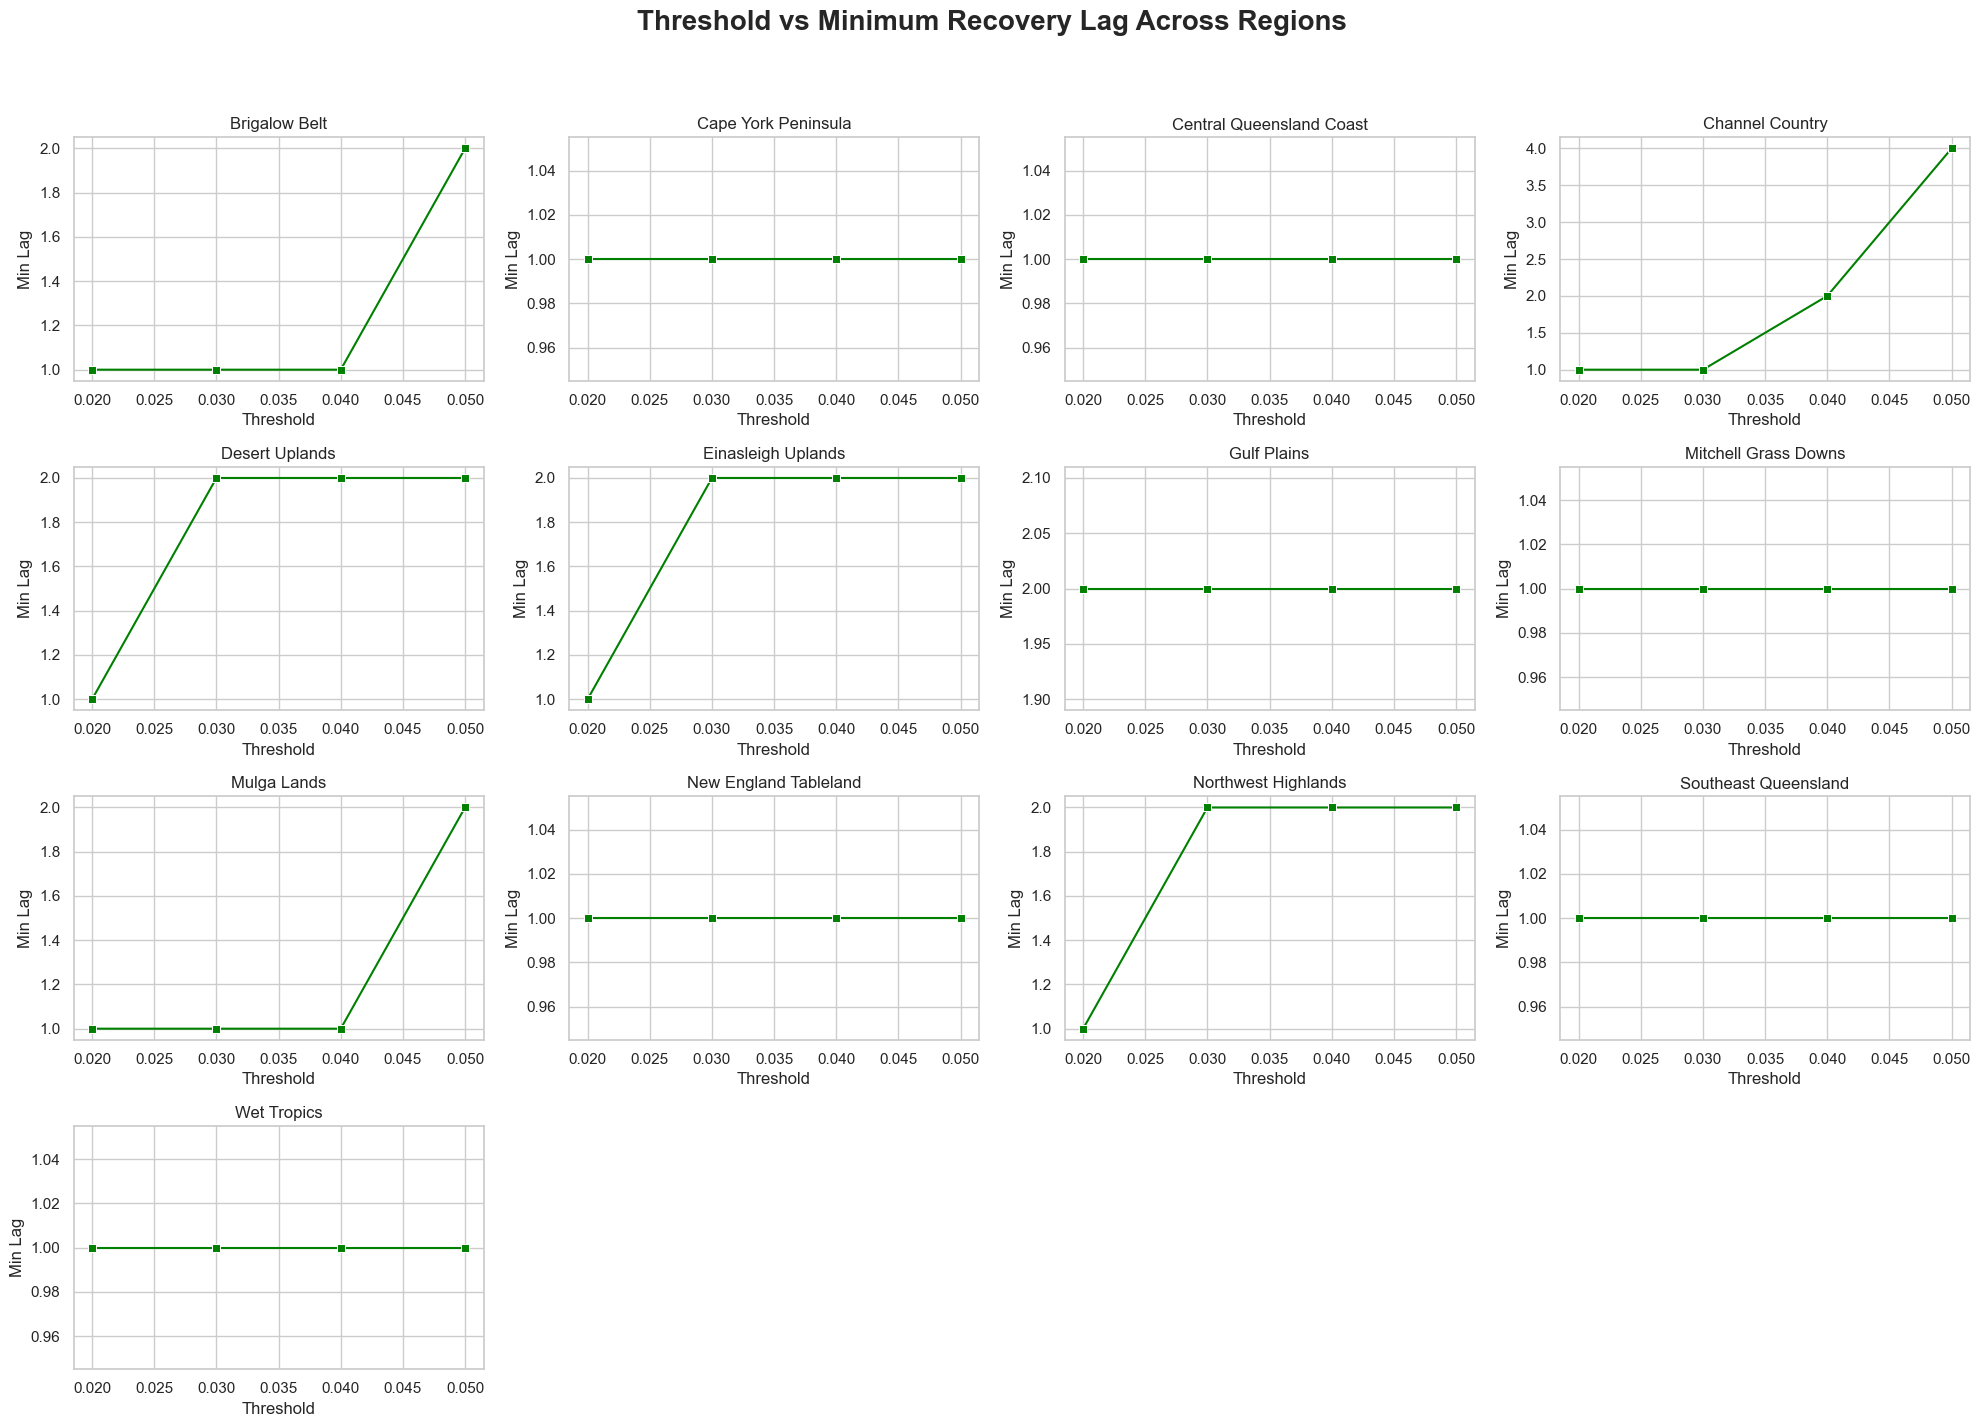

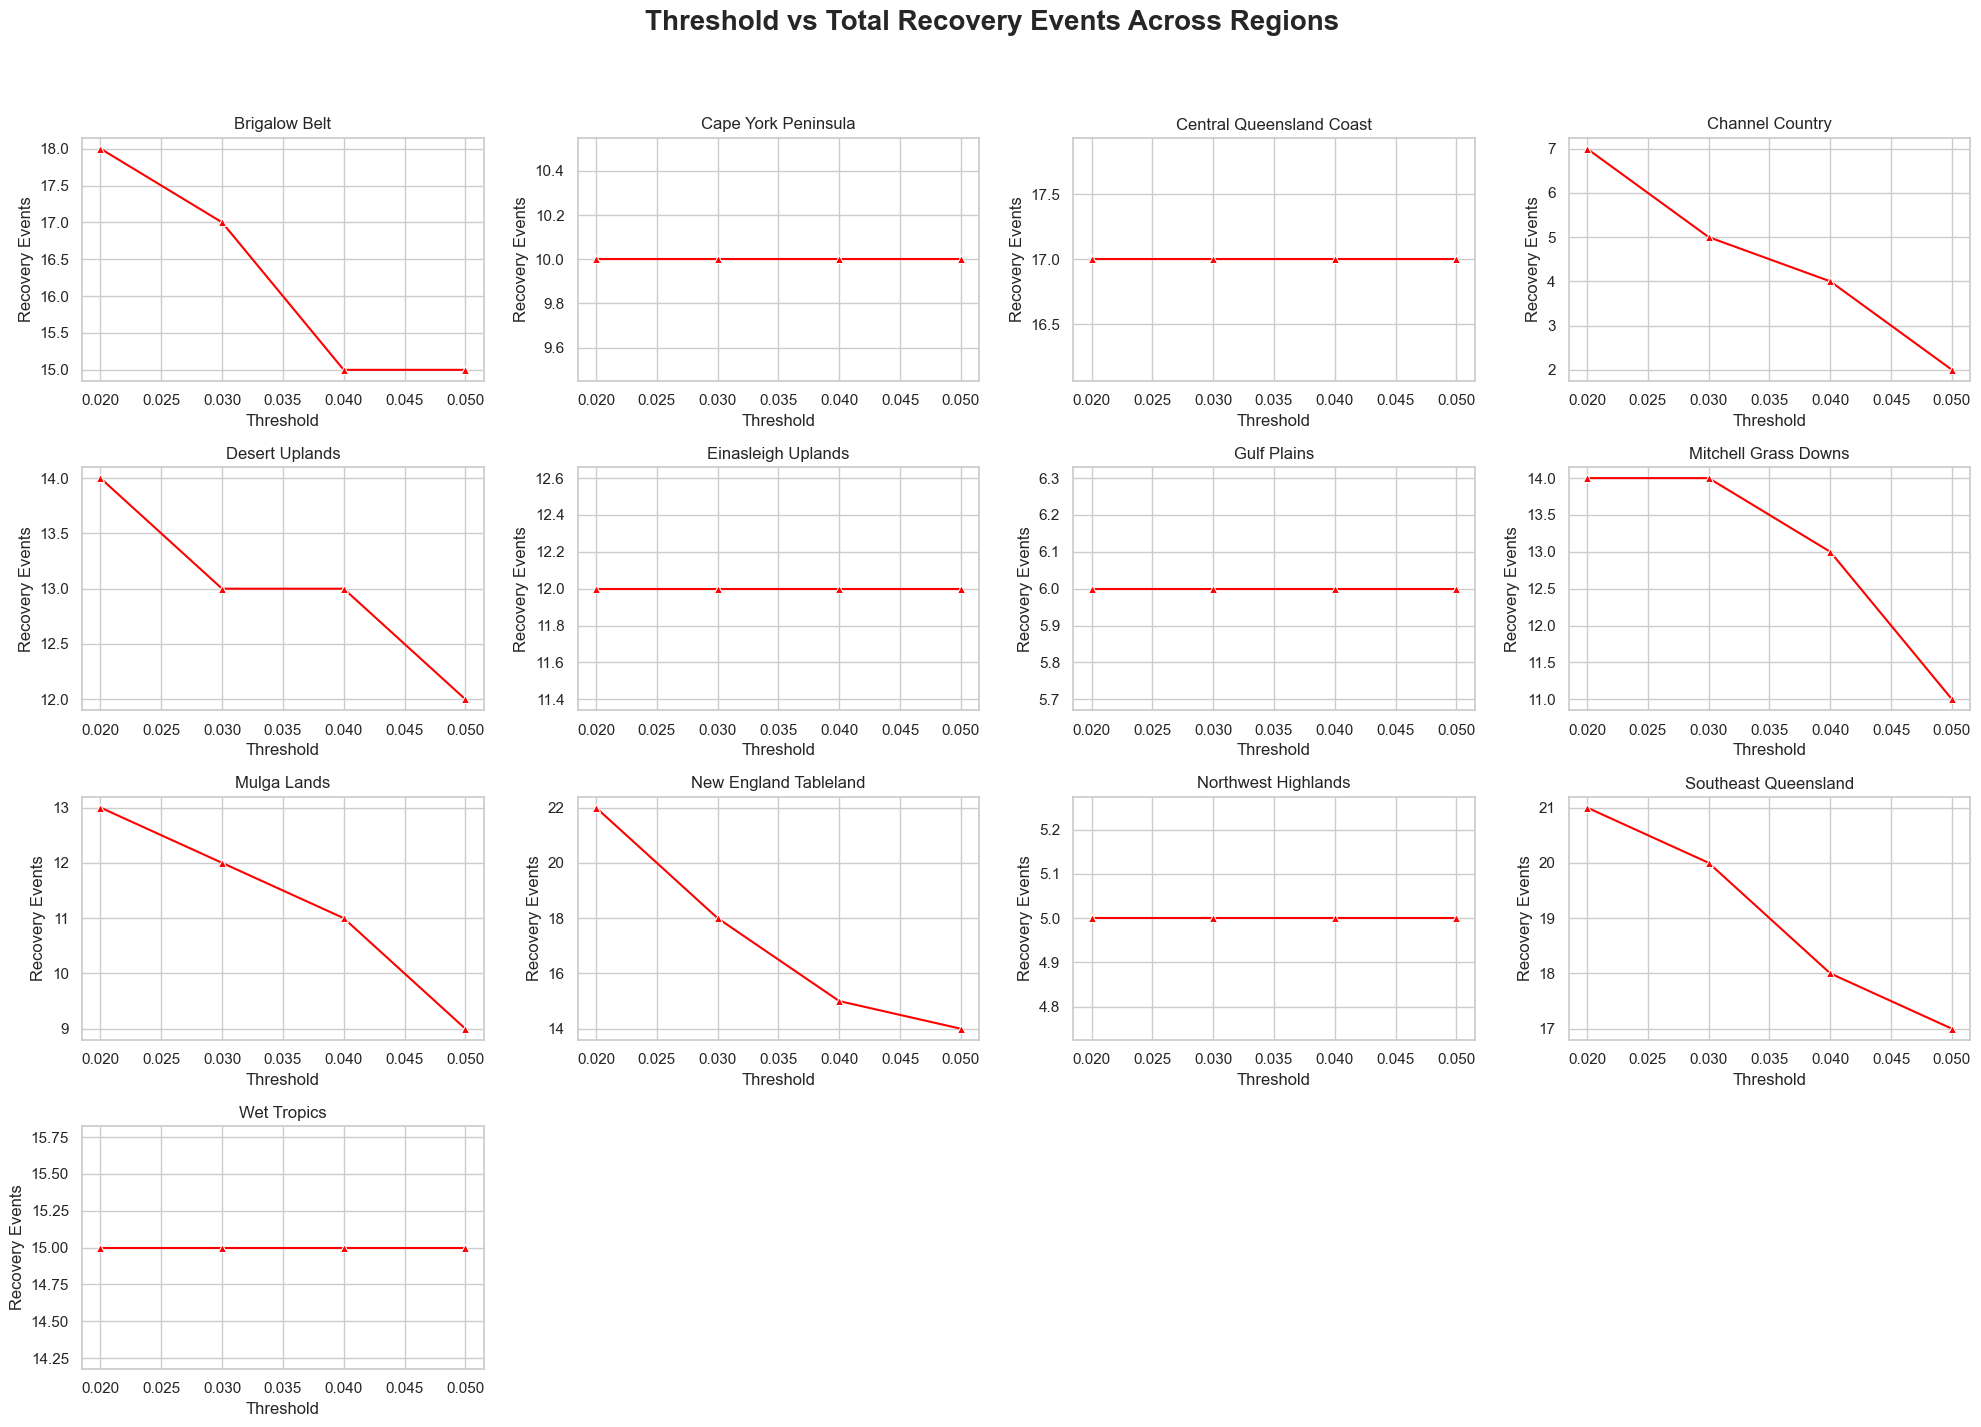

In [7]:
# Let's plot differently: 
# - 1 figure for each metric (Average Recovery Lag, Minimum Recovery Lag, Total Recovery Events)
# - Each figure will have 13 subplots (1 subplot per region)

# Define plot layout
n_cols = 4
n_rows = 4

# Plot Average Recovery Lag
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle('Threshold vs Average Recovery Lag Across Regions', fontsize=20, fontweight='bold')

for ax, region in zip(axs.flat, regions):
    region_data = threshold_df[threshold_df['Region'] == region]
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Average Recovery Lag', marker="o")
    ax.set_title(region)
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Avg Lag')

# Hide empty subplots
for i in range(len(regions), n_rows * n_cols):
    fig.delaxes(axs.flat[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot Minimum Recovery Lag
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle('Threshold vs Minimum Recovery Lag Across Regions', fontsize=20, fontweight='bold')

for ax, region in zip(axs.flat, regions):
    region_data = threshold_df[threshold_df['Region'] == region]
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Minimum Recovery Lag', marker="s", color="green")
    ax.set_title(region)
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Min Lag')

# Hide empty subplots
for i in range(len(regions), n_rows * n_cols):
    fig.delaxes(axs.flat[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot Total Recovery Events
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle('Threshold vs Total Recovery Events Across Regions', fontsize=20, fontweight='bold')

for ax, region in zip(axs.flat, regions):
    region_data = threshold_df[threshold_df['Region'] == region]
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Total Recovery Events', marker="^", color="red")
    ax.set_title(region)
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Recovery Events')

# Hide empty subplots
for i in range(len(regions), n_rows * n_cols):
    fig.delaxes(axs.flat[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


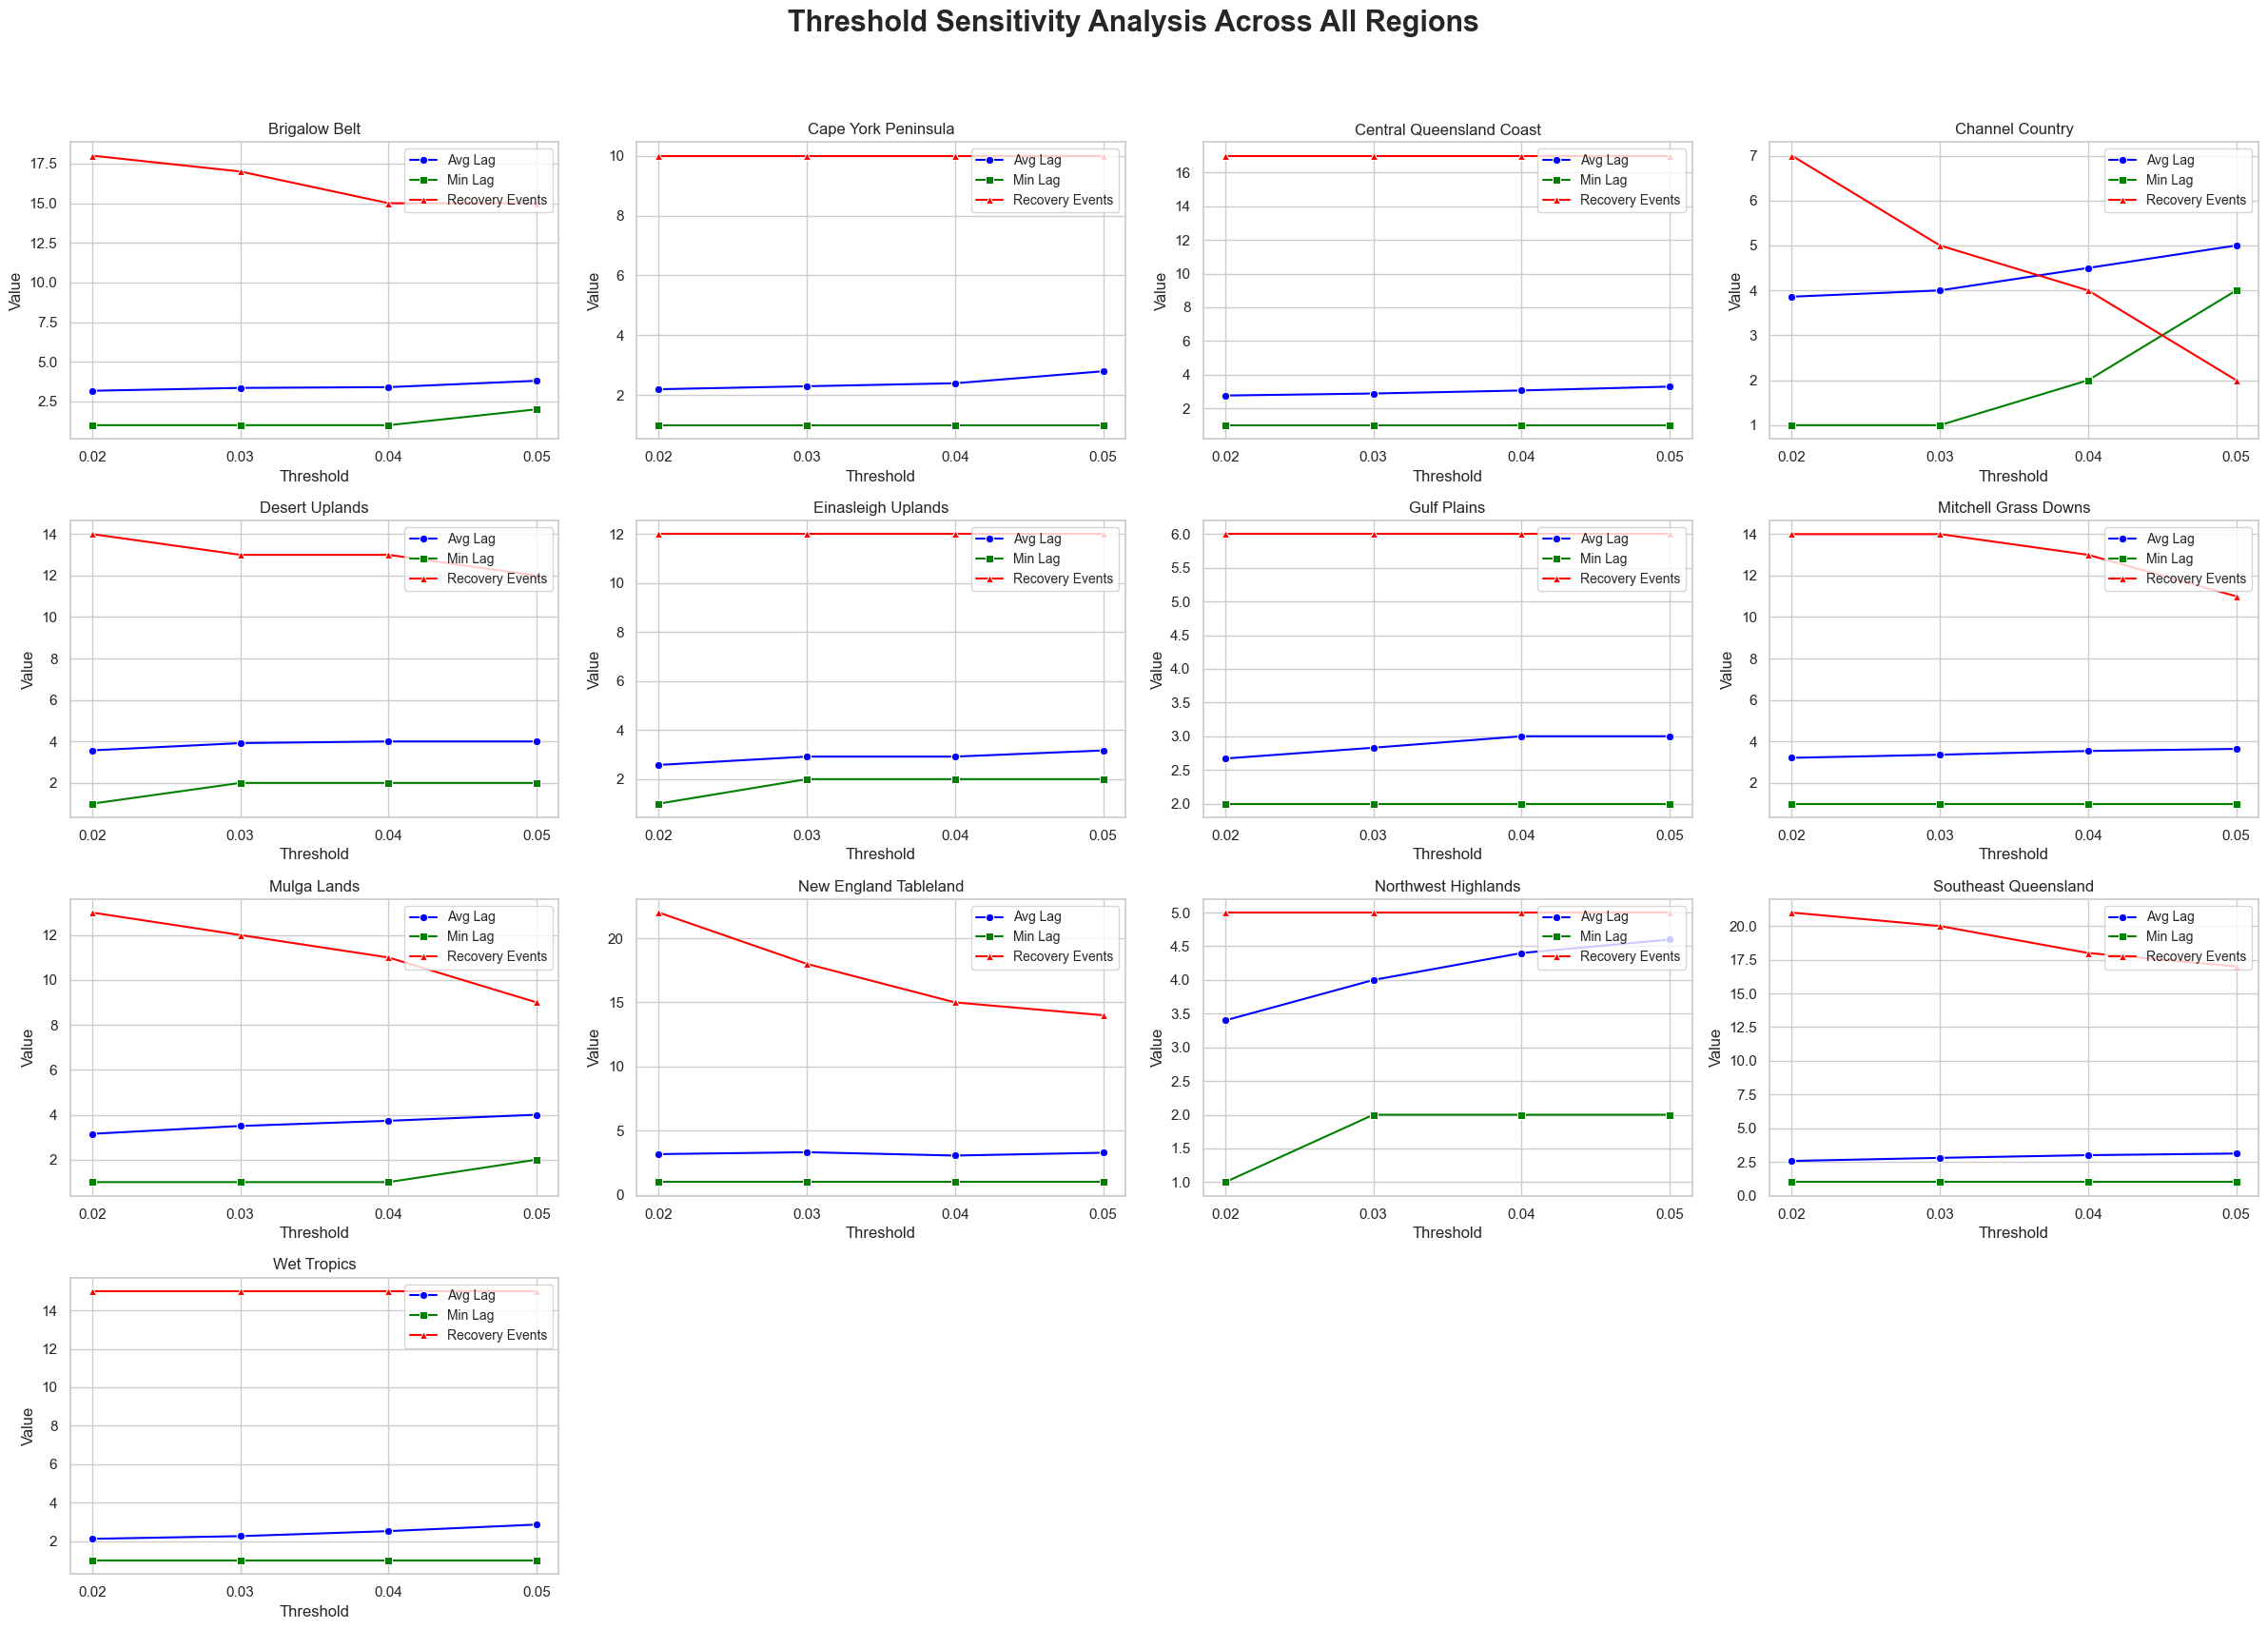

In [8]:
# Update the plot: Force x-axis to only show 0.02, 0.03, 0.04, 0.05 as ticks
import matplotlib.pyplot as plt


fig, axs = plt.subplots(n_rows, n_cols, figsize=(24, 18))
fig.suptitle('Threshold Sensitivity Analysis Across All Regions', fontsize=22, fontweight='bold')

# Define specific ticks for Threshold
threshold_ticks = [0.02, 0.03, 0.04, 0.05]

# Plot for each region
for ax, region in zip(axs.flat, regions):
    region_data = threshold_df[threshold_df['Region'] == region]
    
    # Plot Average Recovery Lag
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Average Recovery Lag', marker="o", label='Avg Lag', color='blue')
    
    # Plot Minimum Recovery Lag
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Minimum Recovery Lag', marker="s", label='Min Lag', color='green')
    
    # Plot Total Recovery Events
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Total Recovery Events', marker="^", label='Recovery Events', color='red')
    
    ax.set_title(region)
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Value')
    ax.grid(True)
    
    ax.set_xticks(threshold_ticks)
    ax.set_xticklabels([str(t) for t in threshold_ticks])

    # Only put legend once
    ax.legend(loc='upper right', fontsize='small')

# Hide empty subplots
for i in range(len(regions), n_rows * n_cols):
    fig.delaxes(axs.flat[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [12]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Let's build the automatic best threshold selector

# Empty list to collect results
best_thresholds = []

# Process each region
for region in regions:
    region_data = threshold_df[threshold_df['Region'] == region]
    
    # Step 1: Filter out thresholds where Minimum Recovery Lag == 0
    filtered = region_data[region_data['Minimum Recovery Lag'] > 0]
    
    if filtered.empty:
        # If no valid thresholds, mark as None
        best_thresholds.append({
            'Region': region,
            'Best Threshold': None,
            'Average Recovery Lag': None,
            'Minimum Recovery Lag': None,
            'Total Recovery Events': None
        })
    else:
        # Step 2: Select thresholds with moderate number of recovery events
        median_events = filtered['Total Recovery Events'].median()
        
        # Find closest to median number of events
        filtered['Events_Deviation'] = (filtered['Total Recovery Events'] - median_events).abs()
        
        # Sort: first by Events Deviation, then by Average Recovery Lag (prefer smaller lag)
        selected = filtered.sort_values(['Events_Deviation', 'Average Recovery Lag']).iloc[0]
        
        best_thresholds.append({
            'Region': region,
            'Best Threshold': selected['Threshold'],
            'Average Recovery Lag': selected['Average Recovery Lag'],
            'Minimum Recovery Lag': selected['Minimum Recovery Lag'],
            'Total Recovery Events': selected['Total Recovery Events']
        })

# Create final dataframe
best_thresholds_df = pd.DataFrame(best_thresholds)

import ace_tools as tools
tools.display_dataframe_to_user(name="Best Thresholds Per Region", dataframe=best_thresholds_df)

# Show the table
best_thresholds_df


ModuleNotFoundError: No module named 'ace_tools'

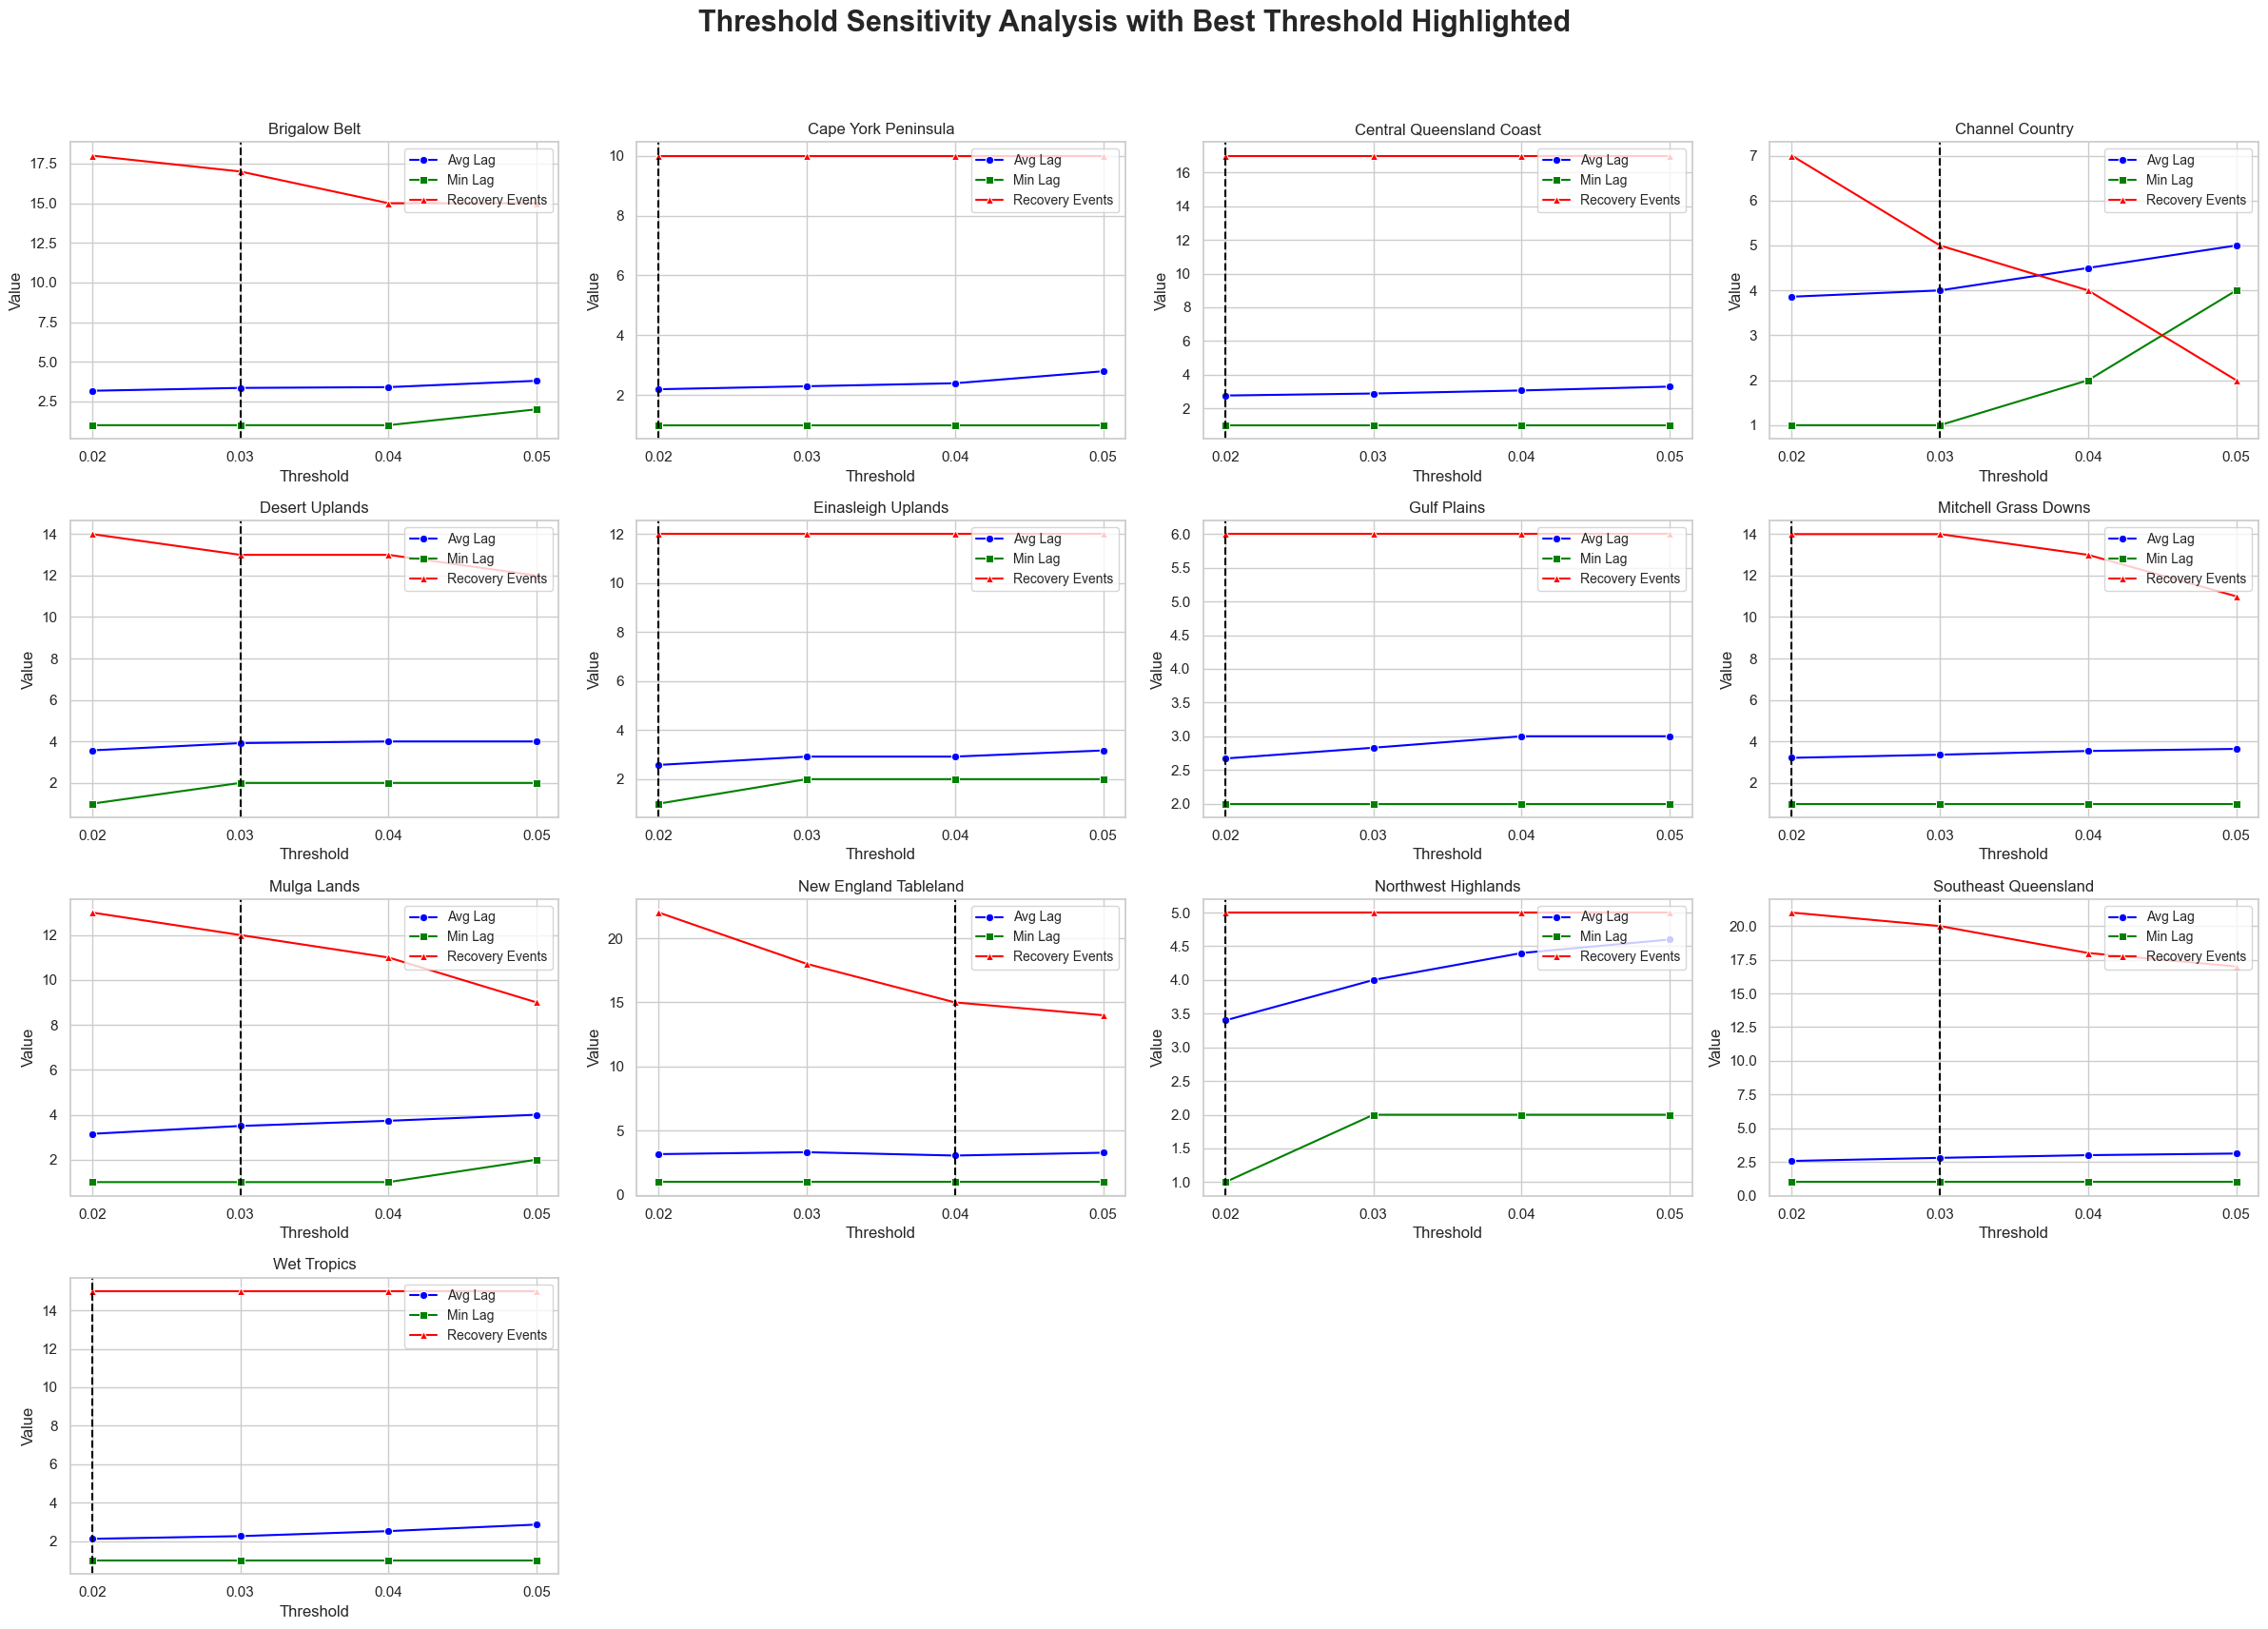

In [10]:
# Now update the combined plot to highlight the best threshold per region

fig, axs = plt.subplots(n_rows, n_cols, figsize=(24, 18))
fig.suptitle('Threshold Sensitivity Analysis with Best Threshold Highlighted', fontsize=22, fontweight='bold')

# Define ticks for Threshold
threshold_ticks = [0.02, 0.03, 0.04, 0.05]

# Plot for each region
for ax, region in zip(axs.flat, regions):
    region_data = threshold_df[threshold_df['Region'] == region]
    best_row = best_thresholds_df[best_thresholds_df['Region'] == region].iloc[0]
    best_threshold = best_row['Best Threshold']
    
    # Plot Average Recovery Lag
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Average Recovery Lag', marker="o", label='Avg Lag', color='blue')
    
    # Plot Minimum Recovery Lag
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Minimum Recovery Lag', marker="s", label='Min Lag', color='green')
    
    # Plot Total Recovery Events
    sns.lineplot(ax=ax, data=region_data, x='Threshold', y='Total Recovery Events', marker="^", label='Recovery Events', color='red')
    
    ax.set_title(region)
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Value')
    ax.grid(True)
    
    ax.set_xticks(threshold_ticks)
    ax.set_xticklabels([str(t) for t in threshold_ticks])

    # Highlight best threshold with vertical line
    if pd.notna(best_threshold):
        ax.axvline(x=best_threshold, color='black', linestyle='--', linewidth=1.5)

    # Only put legend once
    ax.legend(loc='upper right', fontsize='small')

# Hide empty subplots
for i in range(len(regions), n_rows * n_cols):
    fig.delaxes(axs.flat[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy

  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl (41.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip show ace_tools

Name: ace_tools
Version: 0.0
Summary: A placeholder empty package
Home-page: 
Author: Paul McMillan
Author-email: paul@mcmillan.ws
License: 
Location: c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 04\venv-cd4\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Re-import necessary packages
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Load the re-uploaded file
threshold_df = pd.read_csv("Data\Data for CD Label\Threshold_Setting_Process.csv")

# Get unique regions
regions = threshold_df['Region'].unique()

# Define elbow detection function
def find_elbow(x, y):
    x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    line_vec = np.array([x_norm[-1] - x_norm[0], y_norm[-1] - y_norm[0]])
    line_vec = line_vec / np.linalg.norm(line_vec)
    
    vec_from_first = np.stack([x_norm - x_norm[0], y_norm - y_norm[0]], axis=1)
    scalar_proj = np.dot(vec_from_first, line_vec)
    proj = np.outer(scalar_proj, line_vec)
    vec_to_line = vec_from_first - proj
    dist_to_line = np.linalg.norm(vec_to_line, axis=1)
    
    elbow_idx = np.argmax(dist_to_line)
    return elbow_idx

# Analyze using Elbow Method
elbow_best_thresholds = []

for region in regions:
    region_data = threshold_df[threshold_df['Region'] == region]
    region_data = region_data.sort_values('Threshold')
    
    x = region_data['Threshold'].values
    y = region_data['Total Recovery Events'].values
    
    if len(x) >= 3:
        elbow_idx = find_elbow(x, y)
        selected_row = region_data.iloc[elbow_idx]
        
        elbow_best_thresholds.append({
            'Region': region,
            'Best Threshold (Elbow)': selected_row['Threshold'],
            'Average Recovery Lag': selected_row['Average Recovery Lag'],
            'Minimum Recovery Lag': selected_row['Minimum Recovery Lag'],
            'Total Recovery Events': selected_row['Total Recovery Events']
        })
    else:
        elbow_best_thresholds.append({
            'Region': region,
            'Best Threshold (Elbow)': None,
            'Average Recovery Lag': None,
            'Minimum Recovery Lag': None,
            'Total Recovery Events': None
        })

# Create final DataFrame
elbow_best_thresholds_df = pd.DataFrame(elbow_best_thresholds)

# Show the table
elbow_best_thresholds_df


<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_14016\725733220.py:8: SyntaxWarning: invalid escape sequence '\D'
  threshold_df = pd.read_csv("Data\Data for CD Label\Threshold_Setting_Process.csv")
C:\Users\Jspch\AppData\Local\Temp\ipykernel_14016\725733220.py:16: RuntimeWarning: invalid value encountered in divide
  y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))


,Region,Best Threshold (Elbow),Average Recovery Lag,Minimum Recovery Lag,Total Recovery Events
0,Brigalow Belt,0.04,3.40,1,15
1,Cape York Peninsula,0.02,2.20,1,10
2,Central Queensland Coast,0.02,2.76,1,17
3,Channel Country,0.03,4.00,1,5
4,Desert Uplands,0.03,3.92,2,13
5,Einasleigh Uplands,0.02,2.58,1,12
6,Gulf Plains,0.02,2.67,2,6
7,Mitchell Grass Downs,0.03,3.36,1,14
8,Mulga Lands,0.04,3.73,1,11
9,New England Tableland,0.04,3.07,1,15
